# Assignment 2

In [3]:
# Ignore the Warning Messages
import warnings
warnings.filterwarnings('ignore')

### Lending Club Data
Data taken from: https://www.kaggle.com/wordsforthewise/lending-club

We will be working with a dataset focused on the peer-to-peer lending company, LendingClub. 

### Objective

We will build a model that predicts the largest loan amount that will be successfully funded for any given individual.

## Loading Data


In [4]:
import pandas as pd

approved_loans_1 = pd.read_csv('accepted.csv')
declined_loans_1 = pd.read_csv('rejected.csv')

In [5]:
import copy
declined_loans = copy.deepcopy(declined_loans_1)

In [6]:
approved_loans = copy.deepcopy(approved_loans_1)

In [7]:
declined_loans.shape

(27648741, 9)

In [8]:
approved_loans.shape

(2260701, 151)

I will also initially work with 50% of randomly picked data and then try to run on more data (I initially run with all data but one-hot encoding of zip cdes took moore than 3 hours of running)

In [9]:
# slice the date to take in only 50% entries
approved_loans = approved_loans.sample(frac=0.5, replace=False, random_state=1)
declined_loans = declined_loans.sample(frac=0.5, replace=False, random_state=1)


In [10]:
approved_loans.shape

(1130350, 151)

In [11]:
declined_loans.shape

(13824370, 9)

In [12]:
# balance out both sets to have same amount of entries
declined_loans = declined_loans.head(1130350)

In [13]:
declined_loans.shape

(1130350, 9)

# Part 1: Data Cleaning

### Step 1: Checking out what's going on in the dataframes.

In [14]:
approved_loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1557444,132555889,NaN,11000.0,11000.0,11000.0,36 months,10.90,359.61,B,B4,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
1089926,69743499,NaN,12000.0,12000.0,12000.0,36 months,6.99,370.48,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
71683,63590274,NaN,5000.0,5000.0,5000.0,36 months,12.05,166.20,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
356146,42364040,NaN,20000.0,20000.0,19975.0,36 months,15.61,699.30,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1396198,144254317,NaN,5000.0,5000.0,5000.0,36 months,18.94,183.13,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
approved_loans.shape

(1130350, 151)

In [16]:
declined_loans.head(5)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
25221177,10000.0,2017-05-09,debt_consolidation,NaN,20.03%,922xx,CA,< 1 year,0.0
15860144,20000.0,2018-11-11,Credit card refinancing,NaN,18.6%,484xx,MI,< 1 year,0.0
6035463,5800.0,2018-08-27,Debt consolidation,NaN,15.79%,906xx,CA,< 1 year,0.0
12636787,11450.0,2017-08-19,Car financing,549.0,100%,754xx,TX,< 1 year,0.0
6076264,3000.0,2018-08-29,Debt consolidation,NaN,7.67%,916xx,CA,< 1 year,0.0


In [17]:
declined_loans.shape

(1130350, 9)

### Step 2: Deciding which columns to keep 

In [18]:
# checking names of all columns for the approved loans 
print("Column names in approved loans dataset:")
print(",\n ".join(list(approved_loans)))

# checking names of all columns for the declined loans 
print("\nColumn names in declined loans dataset:")
print(",\n ".join(list(declined_loans)))

Column names in approved loans dataset:
id,
 member_id,
 loan_amnt,
 funded_amnt,
 funded_amnt_inv,
 term,
 int_rate,
 installment,
 grade,
 sub_grade,
 emp_title,
 emp_length,
 home_ownership,
 annual_inc,
 verification_status,
 issue_d,
 loan_status,
 pymnt_plan,
 url,
 desc,
 purpose,
 title,
 zip_code,
 addr_state,
 dti,
 delinq_2yrs,
 earliest_cr_line,
 fico_range_low,
 fico_range_high,
 inq_last_6mths,
 mths_since_last_delinq,
 mths_since_last_record,
 open_acc,
 pub_rec,
 revol_bal,
 revol_util,
 total_acc,
 initial_list_status,
 out_prncp,
 out_prncp_inv,
 total_pymnt,
 total_pymnt_inv,
 total_rec_prncp,
 total_rec_int,
 total_rec_late_fee,
 recoveries,
 collection_recovery_fee,
 last_pymnt_d,
 last_pymnt_amnt,
 next_pymnt_d,
 last_credit_pull_d,
 last_fico_range_high,
 last_fico_range_low,
 collections_12_mths_ex_med,
 mths_since_last_major_derog,
 policy_code,
 application_type,
 annual_inc_joint,
 dti_joint,
 verification_status_joint,
 acc_now_delinq,
 tot_coll_amt,
 tot_cu

#### 2.1. Based on the names in both columns, we will manually pick columns with the same data and change their names in the approved dataset to match the names in the declined set. 

In [19]:
# Finding in the approved dataset the columns with similar data as in declined set 
approved_loans = approved_loans[['loan_amnt', 'issue_d', 'dti', 'addr_state', 'emp_length', 'policy_code', 'zip_code']]

# Renaming the column names to the same as in declined dataset
approved_loans.rename(index=str, inplace=True, columns={
    'loan_amnt': 'Amount Requested',
    'issue_d': 'Application Date',
    'dti': 'Debt-To-Income Ratio',
    'addr_state': 'State',
    'emp_length': 'Employment Length',
    'policy_code': 'Policy Code',
    'zip_code' : 'Zip Code'
})

In [20]:
# Checking the new dataset form
approved_loans.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,State,Employment Length,Policy Code,Zip Code
1557444,11000.0,May-2018,16.10,PA,8 years,1.0,169xx
1089926,12000.0,Jan-2016,19.84,TX,9 years,1.0,773xx
71683,5000.0,Nov-2015,16.95,MI,1 year,1.0,490xx
356146,20000.0,Apr-2015,34.56,CA,8 years,1.0,900xx
1396198,5000.0,Nov-2018,35.58,FL,10+ years,1.0,330xx


#### 2.2 From declined set, we will remove the columns which are missing in the approved dataset as they can bias the model learning process resulting in false rejections.

1. **Loan Title** doesn't possess important information as it shouldn't affect the outcome. Hence, we can drop it. 
2. **Risk Score** is an important metric, but there is no equivalent of it in the approved dataset as applications before November 5, 2013, the risk score is the borrower's FICO score, and after November 5, 2013, the risk score is the borrower's Vantage score. Hence, before and after November 5, 2013, the data scales would be different. 
3. **State** data is captured by the **Zip Code** data as Zip Code corresponds to the state. Hence, we keep zip codes that give more specific living places than state information as first two digits capture the state and with the 3rd digit, we also get information about the  sectional center facility area which divides further the demographic living condition information. This can be helpful as the rliving cnditions of the requester can affect the amount of loan granted to them and 3-digit zip code gives a good division into living conditions (https://www.maptive.com/3-digit-zip-code-maps/). 
4. I have also decided to drop the **Application Date** as in approved dataset it is reffered to the date the loan was funded while in the declined dataset it refers to the date the brrower applied for the loan. Hence, the dates are correspodning to different information. Hence, we would aassume that the date of application doesn't play role in the loan application outcome. I drop this column after dividing the dataset into 2015-2018 period.

In [21]:
# Removing the missing columns 
declined_loans.drop(['Loan Title', 'Risk_Score', 'State'], axis=1, inplace=True)

In [22]:
# Checking the new dataset form
declined_loans.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,Zip Code,Employment Length,Policy Code
25221177,10000.0,2017-05-09,20.03%,922xx,< 1 year,0.0
15860144,20000.0,2018-11-11,18.6%,484xx,< 1 year,0.0
6035463,5800.0,2018-08-27,15.79%,906xx,< 1 year,0.0
12636787,11450.0,2017-08-19,100%,754xx,< 1 year,0.0
6076264,3000.0,2018-08-29,7.67%,916xx,< 1 year,0.0


#### 2.3 Encoding weather the loan has been approved or not.

In [23]:
approved_loans['Approved'] = 1
declined_loans['Approved'] = 0

In [24]:
# Checking updated set
declined_loans.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,Zip Code,Employment Length,Policy Code,Approved
25221177,10000.0,2017-05-09,20.03%,922xx,< 1 year,0.0,0
15860144,20000.0,2018-11-11,18.6%,484xx,< 1 year,0.0,0
6035463,5800.0,2018-08-27,15.79%,906xx,< 1 year,0.0,0
12636787,11450.0,2017-08-19,100%,754xx,< 1 year,0.0,0
6076264,3000.0,2018-08-29,7.67%,916xx,< 1 year,0.0,0


In [25]:
declined_loans.shape

(1130350, 7)

In [26]:
# Checking updated set
approved_loans.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,State,Employment Length,Policy Code,Zip Code,Approved
1557444,11000.0,May-2018,16.10,PA,8 years,1.0,169xx,1
1089926,12000.0,Jan-2016,19.84,TX,9 years,1.0,773xx,1
71683,5000.0,Nov-2015,16.95,MI,1 year,1.0,490xx,1
356146,20000.0,Apr-2015,34.56,CA,8 years,1.0,900xx,1
1396198,5000.0,Nov-2018,35.58,FL,10+ years,1.0,330xx,1


In [27]:
approved_loans.shape

(1130350, 8)

## Step 3. Making data uniform across two datasets

#### 3.1 Formating Debt-To-Income Ratio in the declined set to match the decimal format of approved set. 
Currently, the declined set contains DTI in percentages, hence, we remove % sign and convert the DTI values to float type.

In [28]:
declined_loans['Debt-To-Income Ratio'] = list(map(lambda dti: float(dti[:-1]),
                                             declined_loans['Debt-To-Income Ratio']))


In [29]:
declined_loans.head() 

,Amount Requested,Application Date,Debt-To-Income Ratio,Zip Code,Employment Length,Policy Code,Approved
25221177,10000.0,2017-05-09,20.03,922xx,< 1 year,0.0,0
15860144,20000.0,2018-11-11,18.60,484xx,< 1 year,0.0,0
6035463,5800.0,2018-08-27,15.79,906xx,< 1 year,0.0,0
12636787,11450.0,2017-08-19,100.00,754xx,< 1 year,0.0,0
6076264,3000.0,2018-08-29,7.67,916xx,< 1 year,0.0,0


#### 3.2 Checking for the missing values in the booth datasets.
If the percentage of the missing datat is not high, <10%, we will drop the entries with NaN value. 

In [30]:
nan_info = pd.DataFrame({"Approved loan NaN rows": approved_loans.isnull().sum(),
                          "Approved loan NaN rows %": approved_loans.isnull().sum() / len(approved_loans), 
                          "Declined loan NaN rows": declined_loans.isnull().sum(),
                          "Declined loan NaN rows %": declined_loans.isnull().sum() / len(declined_loans)})


In [31]:
print(nan_info)

                      Approved loan NaN rows  Approved loan NaN rows %  \
Amount Requested                          21                  0.000019   
Application Date                          21                  0.000019   
Approved                                   0                  0.000000   
Debt-To-Income Ratio                     873                  0.000772   
Employment Length                      73579                  0.065094   
Policy Code                               21                  0.000019   
State                                     21                  0.000019   
Zip Code                                  21                  0.000019   

                      Declined loan NaN rows  Declined loan NaN rows %  
Amount Requested                         0.0                  0.000000  
Application Date                         0.0                  0.000000  
Approved                                 0.0                  0.000000  
Debt-To-Income Ratio                     

As the NaN rows are less than 0.1% of each dataset, we can drop those rows as the leftover data contains full set of features and we do noot need to even to populate the missing rows (i.e by making them mean of data). The loss of data won't bias our learning either as it is minimal. 

In [32]:
approved_loans = approved_loans.dropna()
declined_loans = declined_loans.dropna()


#### 3.3 Picking the period of time to work with in our dataset:

We focus here on the period after the great reccesion which ended in 2009. Then, I looked into which years had general stable enviroment based on the The Balance report for US Inflation Rate from 1929 to 2023. In our dataset, starting from 2015 to 2018 are most stable years with low inflation rates. I am selecting those dates to not count for possible cnfidung variables such as inflation and economic crisis in the deetermination of the max loan amount.

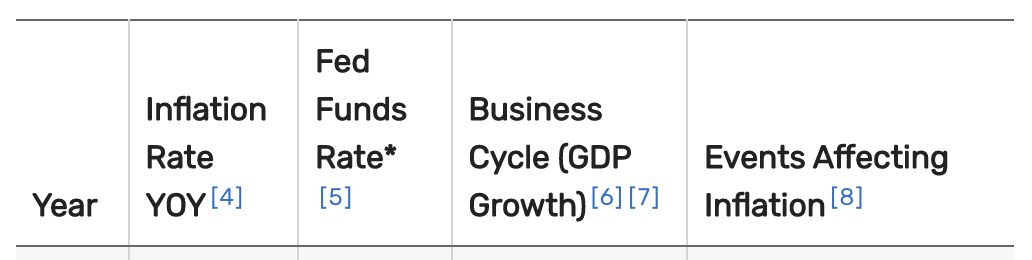

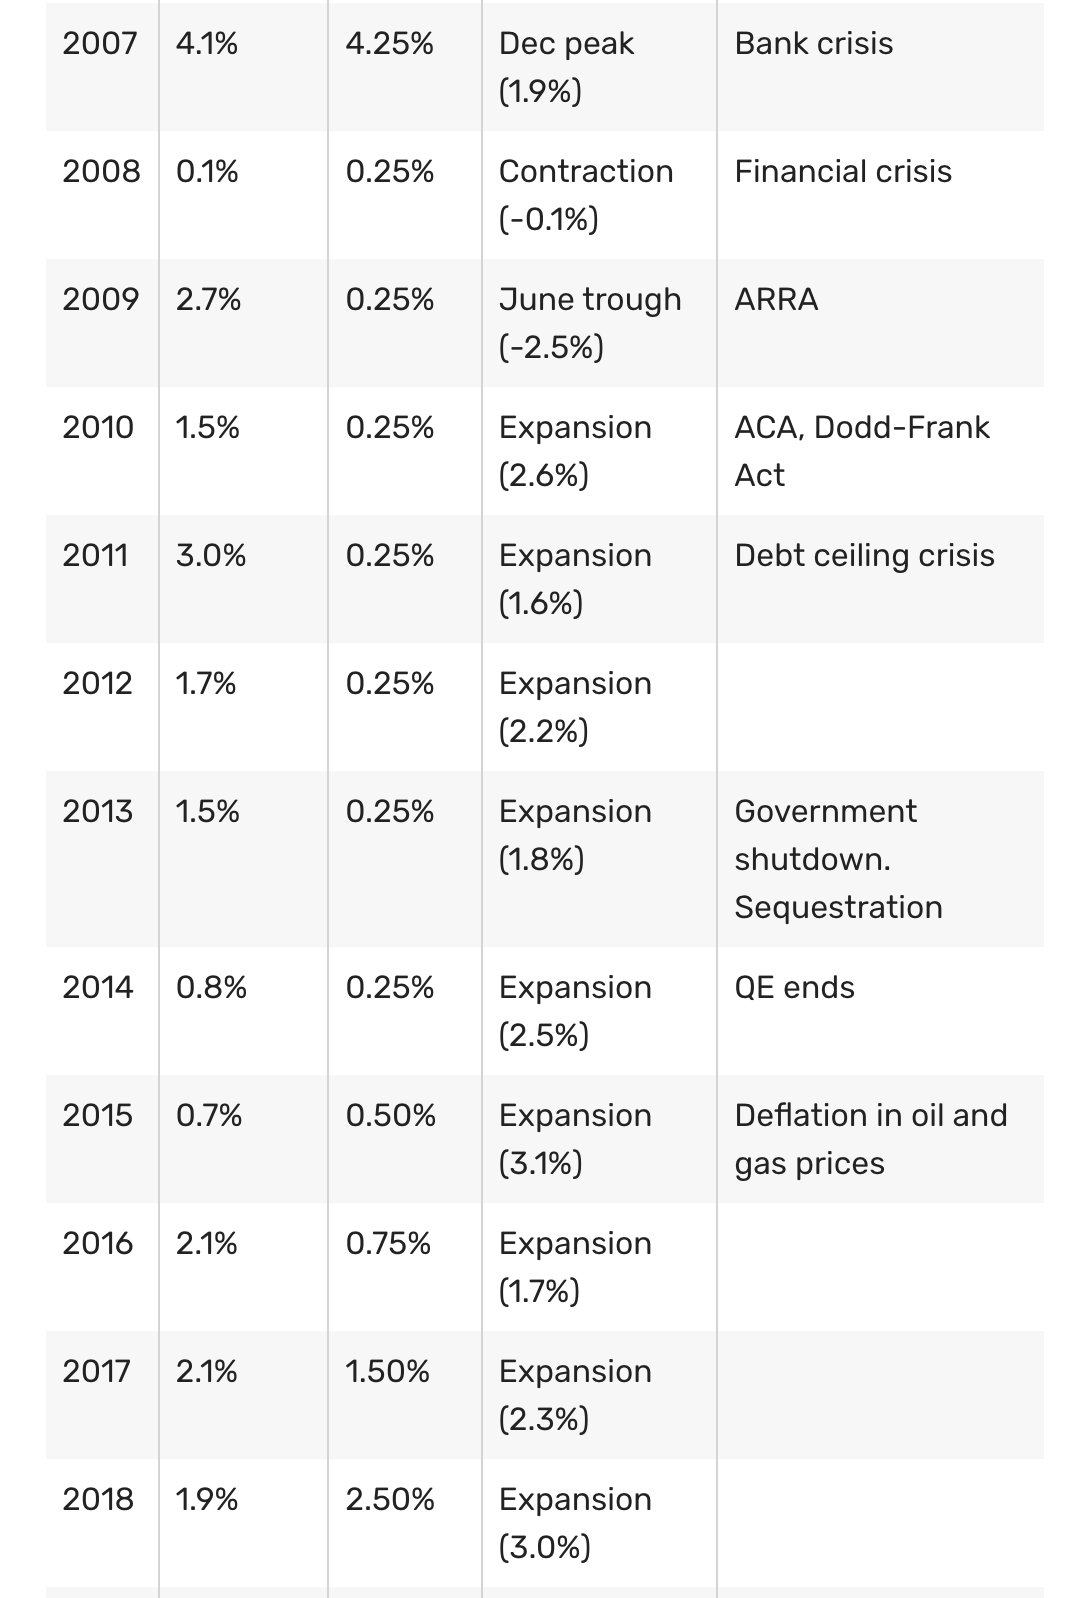
Image taken from https://www.thebalance.com/u-s-inflation-rate-history-by-year-and-forecast-3306093


In [33]:
# making deepcopy of the declined data for further processing 
declined_loans_copy = copy.deepcopy(declined_loans)

In [34]:
# Picking data only between 2015 and end of 2018 for declined loans 
declined_loans_copy = declined_loans_copy[(declined_loans_copy['Application Date'] > '2015-01-01')]

In [35]:
#checking the earliest and lastest dates in the updated dataset
print("The earliest date in the declined dataset is:", declined_loans_copy['Application Date'].min())
print("The latest date in the declined dataset is:", declined_loans_copy['Application Date'].max())


The earliest date in the declined dataset is: 2015-01-02
The latest date in the declined dataset is: 2018-12-31


In [36]:
# Checking the current state of the declined dataset
declined_loans_copy.shape

(952381, 7)

In [37]:
# Checking the current state of the declined dataset
declined_loans_copy.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,Zip Code,Employment Length,Policy Code,Approved
25221177,10000.0,2017-05-09,20.03,922xx,< 1 year,0.0,0
15860144,20000.0,2018-11-11,18.60,484xx,< 1 year,0.0,0
6035463,5800.0,2018-08-27,15.79,906xx,< 1 year,0.0,0
12636787,11450.0,2017-08-19,100.00,754xx,< 1 year,0.0,0
6076264,3000.0,2018-08-29,7.67,916xx,< 1 year,0.0,0


In [38]:
# making deepcopy of the approved data for further processing 
approved_loans_copy = copy.deepcopy(approved_loans)

In [39]:
from datetime import datetime

# A helper function to tranform the string date format in the approved dataset 
# to the datetime format like in the declined dataset
def date_string_to_datetime(row):
    return datetime.strptime(row['Application Date'], "%b-%Y")

In [40]:
# Tranforming the date data by using the helper fucntion
approved_loans_copy['Application Date'] = approved_loans_copy.apply(date_string_to_datetime, axis=1)

In [41]:
# Checking the current state of the approved dataset 
approved_loans_copy.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,State,Employment Length,Policy Code,Zip Code,Approved
1557444,11000.0,2018-05-01,16.10,PA,8 years,1.0,169xx,1
1089926,12000.0,2016-01-01,19.84,TX,9 years,1.0,773xx,1
71683,5000.0,2015-11-01,16.95,MI,1 year,1.0,490xx,1
356146,20000.0,2015-04-01,34.56,CA,8 years,1.0,900xx,1
1396198,5000.0,2018-11-01,35.58,FL,10+ years,1.0,330xx,1


In [42]:
# Picking data only between 2015 and end of 2018 for approved loans 
approved_loans_copy = approved_loans_copy[(approved_loans_copy['Application Date'] > '2015-01-01')]


In [43]:
#checking the earliest and lastest dates in the updated dataset
print("The earliest date in the declined dataset is:", approved_loans_copy['Application Date'].min())
print("The latest date in the declined dataset is:", approved_loans_copy['Application Date'].max())

The earliest date in the declined dataset is: 2015-02-01 00:00:00
The latest date in the declined dataset is: 2018-12-01 00:00:00


In [44]:
# Checking the current state of the approved dataset 
approved_loans_copy.head()

,Amount Requested,Application Date,Debt-To-Income Ratio,State,Employment Length,Policy Code,Zip Code,Approved
1557444,11000.0,2018-05-01,16.10,PA,8 years,1.0,169xx,1
1089926,12000.0,2016-01-01,19.84,TX,9 years,1.0,773xx,1
71683,5000.0,2015-11-01,16.95,MI,1 year,1.0,490xx,1
356146,20000.0,2015-04-01,34.56,CA,8 years,1.0,900xx,1
1396198,5000.0,2018-11-01,35.58,FL,10+ years,1.0,330xx,1


In [45]:
# Checking the current state of the approved dataset 
approved_loans_copy.shape

(817602, 8)

#### 3.4 Dropping Approved date from both sets

In [46]:
# Removing the columns 
declined_loans_copy.drop(['Application Date'], axis=1, inplace=True)
approved_loans_copy.drop(['Application Date', 'State'], axis=1, inplace=True)

In [47]:
approved_loans_copy.head()

,Amount Requested,Debt-To-Income Ratio,Employment Length,Policy Code,Zip Code,Approved
1557444,11000.0,16.10,8 years,1.0,169xx,1
1089926,12000.0,19.84,9 years,1.0,773xx,1
71683,5000.0,16.95,1 year,1.0,490xx,1
356146,20000.0,34.56,8 years,1.0,900xx,1
1396198,5000.0,35.58,10+ years,1.0,330xx,1


In [48]:
declined_loans_copy.head()

,Amount Requested,Debt-To-Income Ratio,Zip Code,Employment Length,Policy Code,Approved
25221177,10000.0,20.03,922xx,< 1 year,0.0,0
15860144,20000.0,18.60,484xx,< 1 year,0.0,0
6035463,5800.0,15.79,906xx,< 1 year,0.0,0
12636787,11450.0,100.00,754xx,< 1 year,0.0,0
6076264,3000.0,7.67,916xx,< 1 year,0.0,0


## Step 4. Merging two datasets and transforming merged variables into cetegorical/numerical variables

#### 4.1 Merging the datasets

In [66]:
# Merging rows of declined and approved datasets
combined_loans = pd.concat([approved_loans_copy, declined_loans_copy])
# Balancing the merged data
combined_loans = combined_loans.sample(frac = 1) 

In [67]:
# checking the merged set
combined_loans.head()

,Amount Requested,Approved,Debt-To-Income Ratio,Employment Length,Policy Code,Zip Code
2115161,15000.0,1,7.40,7 years,1.0,838xx
19418551,8000.0,0,26.89,< 1 year,0.0,641xx
1425629,7200.0,1,34.49,5 years,1.0,300xx
3051758,27600.0,0,41.51,5 years,0.0,441xx
24841844,15000.0,0,1.50,< 1 year,0.0,629xx


#### 4.2 Categorizing Zip Code and Approved columns

In [68]:
# Defining the catigorical variables for zip code and approved columns 
combined_loans['Zip Code'] = combined_loans['Zip Code'].astype("category")
combined_loans['Approved'] = combined_loans['Approved'].astype("category")


#### 4.3 Categorizing Employment length column

In [69]:
from pandas.api.types import CategoricalDtype

# Creating categories for the employment length data 
empl_length = CategoricalDtype(categories=["< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "8 years", "9 years", "10+ years"], ordered=True)
# Categorizing the data
combined_loans['Employment Length'] = combined_loans['Employment Length'].astype(empl_length)
combined_loans['Employment Length'] = combined_loans['Employment Length'].cat.codes
combined_loans['Employment Length'] = combined_loans['Employment Length'].astype("float")

In [70]:
combined_loans.head()

,Amount Requested,Approved,Debt-To-Income Ratio,Employment Length,Policy Code,Zip Code
2115161,15000.0,1,7.40,7.0,1.0,838xx
19418551,8000.0,0,26.89,0.0,0.0,641xx
1425629,7200.0,1,34.49,5.0,1.0,300xx
3051758,27600.0,0,41.51,5.0,0.0,441xx
24841844,15000.0,0,1.50,0.0,0.0,629xx


In [71]:
combined_loans.shape

(1769983, 6)

#### 4.4 Binarizing the Zip Code by using one-hot encoding 

In [75]:
# Tranforming zip code data to one-hot encoding 
zip_codes = pd.get_dummies(combined_loans["Zip Code"])
combined_loans = pd.concat([combined_loans, zip_codes], axis=1)


In [76]:
# Dropping the Zip Code column
combined_loans.drop(["Zip Code"], axis =1, inplace=True)

In [77]:
combined_loans.head()

,Amount Requested,Approved,Debt-To-Income Ratio,Employment Length,Policy Code,000xx,001xx,002xx,003xx,004xx,...,990xx,991xx,992xx,993xx,994xx,995xx,996xx,997xx,998xx,999xx
2115161,15000.0,1,7.40,7.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19418551,8000.0,0,26.89,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1425629,7200.0,1,34.49,5.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3051758,27600.0,0,41.51,5.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24841844,15000.0,0,1.50,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 5. Normalizing the data

I decided to normalize the data to the same scale as magnititute and variance of the data between columns in very different. For example, Amount Requested column has a great variance while DTI has a smaller variance. Addionally, while DTI is in tens, Amount Requested is in thousands. Hence, Amount Requested can have higher impact on the outcome than DTI when DTI should have moore wight in decision.

In [78]:
#creating deepcopy before scaling all the data
combined_loans_copy = copy.deepcopy(combined_loans)

In [79]:
from sklearn.preprocessing import MinMaxScaler

# normalize the data in the scale of 0 to 1 
scaler = MinMaxScaler()
column_name = list(combined_loans_copy.columns.values)
# scaling the values in each column 
scaled = scaler.fit_transform(combined_loans_copy.values)
combined_loans_copy = pd.DataFrame(scaled)
combined_loans_copy.columns = column_name

In [80]:
combined_loans_copy.head()

,Amount Requested,Approved,Debt-To-Income Ratio,Employment Length,Policy Code,000xx,001xx,002xx,003xx,004xx,...,990xx,991xx,992xx,993xx,994xx,995xx,996xx,997xx,998xx,999xx
0,0.050000,1.0,0.000038,0.7,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.026667,0.0,0.000125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.024000,1.0,0.000159,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.092000,0.0,0.000191,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.050000,0.0,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part 2: Modeling & Evaluation

## Step 1. Split and train the data using Logistic Regression

As we predict the largest amount of loan an individual can get approved, I can use a stepwise algorithm, which implements a process of determining the maximum boundary at which the loan is accepted using given parameters. For our gal, I will use initially Logistic Regression to predict if the loan is getting approved or not. 

Then, if the loan is approved:
1. The stepwise algorithm will keep increasing the requested loan amount until it hits the rejection boundary;
2. Once the rejection boundary is hit, the algorithm spits out the largest amount possible for the individual to get approved.

If the loan is declined:
1. The stepwise algorithm reduces the amount until the loan has reached the approved boundary;
2. If the amount gets negative, the individual cannot get a loan with given parameters;
3. Once the approval boundary is hit, the algorithm spits out the largest amount possible for the individual to get approved.

Our step size should be as small as possible (or as small as it makes the most accurate predictions) for this algorithm to work. Hence, with bigger steps, the algorithm will not be accurate. I have chosen the lowest step size working with my machine, but an even smaller size can be set with a more powerful machine. 

#### 1.1 Splitting the data into training and testing data

In [81]:
from sklearn.model_selection import train_test_split

# Dividing the data into predicting and target variables 
X = combined_loans[["Amount Requested", "Debt-To-Income Ratio", "Employment Length", "Policy Code"]+list (zip_codes.columns)]
y = combined_loans["Approved"]

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### 1.2 Training data using Logistic Regression and Cross-Validating

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV



# Training the Logistic Regression model with 3-fold CV, 
# so best hyperparameters are chosen by the cross-validator
# loan_acceptance_model = LogisticRegressionCV(cv=3, random_state=0).fit(X_train, y_train)


loan_acceptance_model = LogisticRegression(random_state=0).fit(X_train, y_train)


#### 1.3 Checking model accuracy on the test data

In [84]:
from sklearn.metrics import *

logit_y_pred = loan_acceptance_model.predict(X_test)
print("Accuracy score of the model on test data: ", round(accuracy_score(y_test, logit_y_pred),3))
print ("Classification report of the model:", classification_report(y_test, logit_y_pred))



Accuracy score of the model on test data:  0.998
Classification report of the model:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    285490
           1       1.00      1.00      1.00    245505

    accuracy                           1.00    530995
   macro avg       1.00      1.00      1.00    530995
weighted avg       1.00      1.00      1.00    530995



## Step 2. Stepwise Algorithm to predict highest amount of eligible loan 

The model and algorithm I have used, can predict the highest amount of loan approved for borrowers from our dataset by looking up their id. Hence, we can input any id and get the max amount the individual can qualify for.

In [85]:
# Setting the step size for the algorithm
increase_amount = 0.01
decrease_amount = 0.01


In [94]:
# Picking two random datapoints to test with
individual_id = 3


# Checking for the original amount requested for the applicant
requested_amount = X_test["Amount Requested"][individual_id-1:individual_id]


In [ ]:
# Determining if the requested loan is approvedd or not 
# This takes  A WHILE to run
if loan_acceptance_model.predict(X_test[individual_id-1:individual_id]) == 1:
    
    print ("Your requested loan can be potentially approved")
    
    # Increment the requested amount by 1 step
    X_test["Amount Requested"][individual_id-1:individual_id] = X_test["Amount Requested"][individual_id-1:individual_id] + increase_amount
    
    current_requested_amount = X_test["Amount Requested"][individual_id-1:individual_id]
    
    # Iterate till the requested amount gets declined
    while loan_acceptance_model.predict(X_test[individual_id-1:individual_id]) == 1:
        
        # Increment the requested loan by 1 step
        X_test["Amount Requested"][individual_id-1:individual_id] = X_test["Amount Requested"][individual_id-1:individual_id]  + increase_amount
        
        current_requested_amount = X_test["Amount Requested"][individual_id-1:individual_id]
        
    # Showcase the output
    print (f"But you can increase your loan amount up to ${int((float(current_requested_amount)-increase_amount) /scaler.scale_[0])}, and get the loan potentially approved")    

else: 
    print ("Your currently requested amount can be potentially rejected")
    
    # Decrement the requested loan by 1 step
    X_test["Amount Requested"][individual_id-1:individual_id] = X_test["Amount Requested"][individual_id - 1:individual_id] - decrease_amount
    current_requested_amount = X_test["Amount Requested"][individual_id-1:individual_id]
    
    # Iterate till the requested amount gets approved or the loan gets negative
    while loan_acceptance_model.predict(X_test[individual_id-1:individual_id]) == 0 and float(current_requested_amount)>0:
        # Decrement the requested loan by 1 step
        X_test["Amount Requested"][individual_id-1:individual_id] = X_test["Amount Requested"][individual_id-1:individual_id]  - decrease_amount
        current_requested_amount = X_test["Amount Requested"][individual_id-1:individual_id]
    
    # Determine if the requested amount is still positive
    if float(current_requested_amount)>0:    
        print (f"But if you decrease your requested loan amount to be ${int((float(current_requested_amount)+decrease_amount)/scaler.scale_[0])}, it can potentially get be approved")

# Assign the initial requested amount
X_test["Amount Requested"][individual_id-1:individual_id] = requested_amount


Your currently requested amount can be potentially rejected


# Part 3: Metrics

To assess further the performance of my model, I have built a confusion matrix which shows the summary of prediction results of number of correct and incorrect predictions for the model. The confusion matrix further supported the high accuracy of my model. Next, I used cross-validation to check for the overfitting of the model and got similar accuracy for each run, hence, the model is most likely not overfitting. The higher number of fold ca n be run further to asses this, but it took me more than 2 hours with 5 folds.. 

Confusion matrix, without normalization
[[284497    993]
 [    33 245472]]
Normalized confusion matrix
[[9.96521770e-01 3.47823041e-03]
 [1.34416814e-04 9.99865583e-01]]


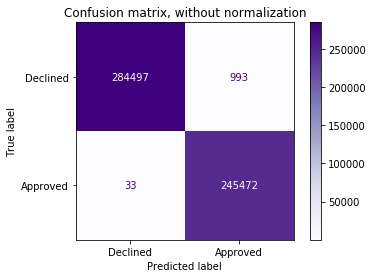

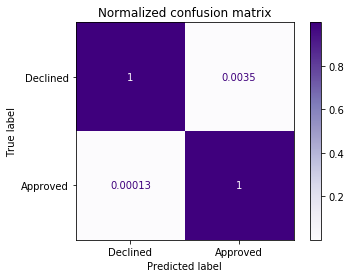

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names = ["Declined", "Approved"]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(loan_acceptance_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Purples,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [ ]:
from sklearn.model_selection import cross_validate

# Showing the classification report
y_pred = loan_acceptance_model.predict (X_test)
print(classification_report(y_test, y_pred))

# Cross-validating the model 
cv_model = cross_validate(loan_acceptance_model, X_train, y_train, cv=3)

In [92]:
# Showing cv results 
print ("Test Scores for each fold of the cross validation for our model :",cv_model["test_score"])



Test Scores for each fold of the cross validation for our model : [0.99819853 0.99817432 0.99816705]
